<a href="https://colab.research.google.com/github/elleniayele/project-2-part-4/blob/main/Copy_of_project_2_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
import matplotlib.pyplot as plt
import seaborn as sns
set_config(display='diagram')

# Load The Data

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


checking duplicates

In [ ]:
df.duplicated().sum()

1

dropping duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

we have 1337 rows and 7 columns

In [ ]:
df.shape

(1337, 7)

In [ ]:
df.isna().sum().sum()

0

check for any incosistencies

In [ ]:
for col in df:
  print(col)
  print(df[col].unique())
  print('\n\n')

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]



sex
['female' 'male']



bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.

all are unique and consistent

let's find relationship between the columns

In [ ]:
corr=df.corr()

<ipython-input-13-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


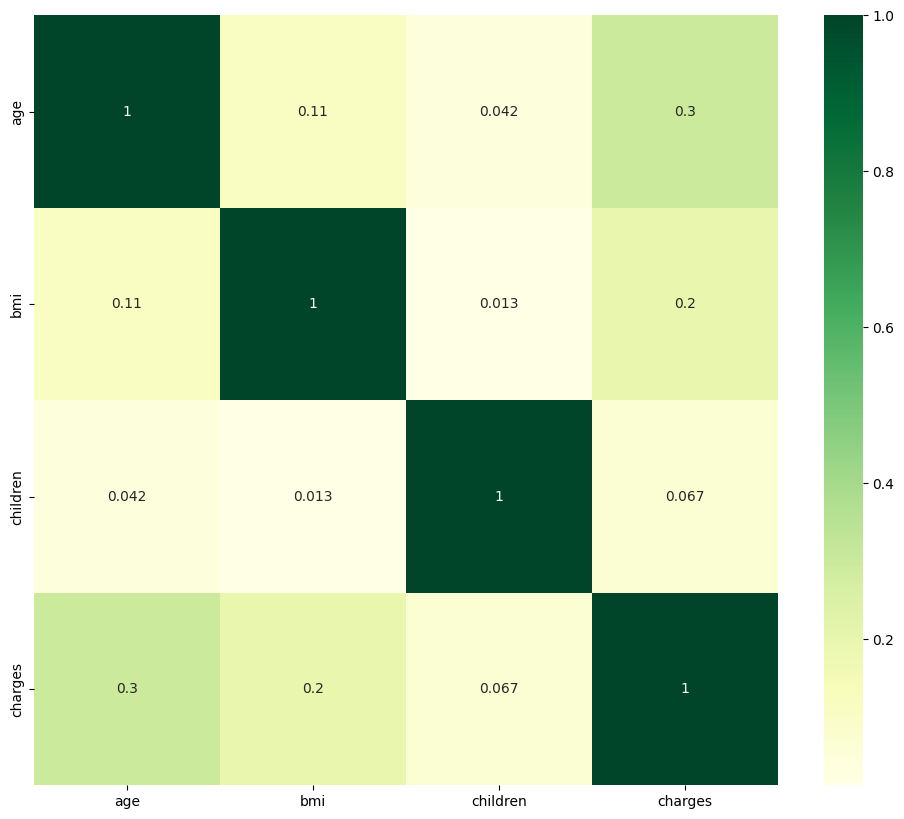

In [ ]:
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'YlGn', annot=True);

n here, age and charges are a bit correlated to each other but other featues have postive but little correlation, let's investigate further.

In [ ]:
#lets visualize the data

Text(0.5, 1.0, 'age vs bmi')

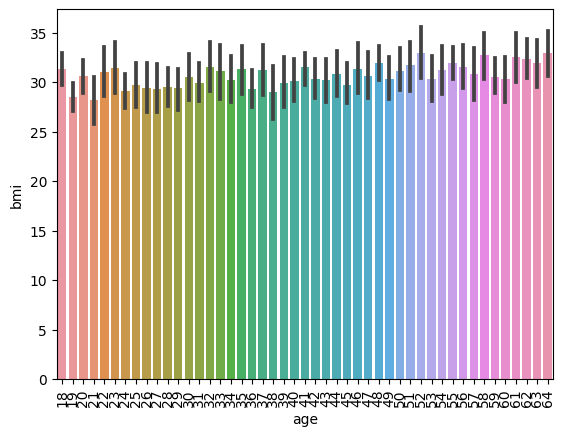

In [ ]:
sns.barplot(data=df, y='bmi', x='age');
plt.xticks(rotation=90)
ax.set_title('age vs bmi')

from this data, the age and bmi are not correlated, no way of determining if they are related to each other or not

Text(0.5, 1.0, 'age vs charges')

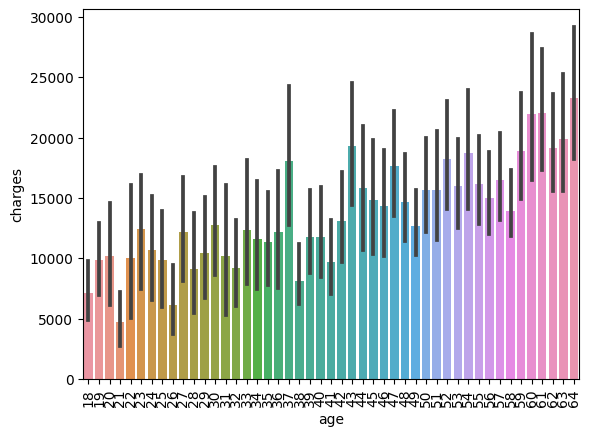

In [ ]:
sns.barplot(data=df, y='charges', x='age');
plt.xticks(rotation=90)
ax.set_title('age vs charges')

in here, it can be seen that with age, the charges increases meaning as older people get, they are more likely riskier, so the charged more while younger people are less riskier fo ehy get too be charged less.

Text(0.5, 1.0, 'children vs charges')

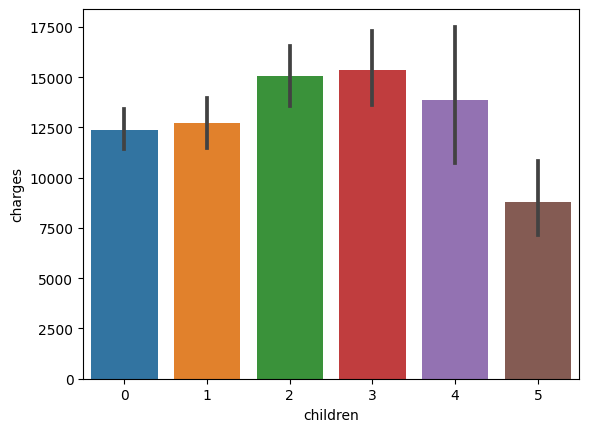

In [ ]:
sns.barplot(data=df, y='charges', x='children');
ax.set_title('children vs charges')

In here, it can be shown as people with no childeren and up to 3 children, the charges increase while after 3 kids, the charges drop again since most of the parents have children with less than 3 kids.

### splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('charges', axis=1)
y=df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#pre processing the data

In [ ]:
num_selector= make_column_selector(dtype_include= 'number')
cat_selector= make_column_selector(dtype_include= 'object')

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#catagorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple,remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])

In [ ]:
preprocessor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])

In [ ]:
#transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[-0.8629477 , -0.76233578, -0.91222776, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.71517467,  0.50682967,  1.59660724, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49772799, -0.28494327,  0.7603289 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.36424928, -1.43268136, -0.07594943, ...,  0.        ,
         0.        ,  1.        ],
       [-0.07518809, -0.43464824,  1.59660724, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29003162,  0.87277515,  0.7603289 , ...,  0.        ,
         1.        ,  0.        ]])

### using linear regression model

In [ ]:
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
training_predictions = linreg_pipe.predict(X_train)
test_predictions = linreg_pipe.predict(X_test)

lets evaluate the metrix

In [ ]:
df['charges'].median()

9386.1613

In [ ]:
train_MAE= mean_absolute_error(y_train,training_predictions)
test_MAE= mean_absolute_error(y_test,test_predictions)
print(f'train_MAE:{train_MAE}')
print (f'test_MAE:{test_MAE}')

train_MAE:4207.532348083832
test_MAE:4068.512605131343


In here, we can say that our model was off on predictions by  4207.53thetrainingset,itwasoffonpredictionsby 4068.51. that means that since the median price for charges is $9386.16, it was off on it's predictions by about 44.82 on average. and our model is correctly predicting 0.551%.

In [ ]:
train_MSE= mean_squared_error(y_train,training_predictions)
test_MSE= mean_squared_error(y_test,test_predictions)
print(f'train_MSE:{train_MSE}')
print (f'test_MSE:{test_MSE}')

train_MSE:37182119.09106153
test_MSE:35276479.75387868


In [ ]:
train_RMSE= mean_squared_error(y_train,training_predictions,squared=False)
test_RMSE= mean_squared_error(y_test,test_predictions,squared=False)
print(f'train_RMSE:{train_RMSE}')
print (f'test_RMSE:{test_RMSE}')

train_RMSE:6097.714251345461
test_RMSE:5939.4006224432005


the mean absolute error of the testing data was 4207 but the rmse is a little larger. it means while our average error was 4207, it's making larger errors.

the model is not overfit or underfit, it is well balanced, i see that the problem with a reduction of accuracy of predictions is due to the datas not related to each other that much including the target , i would suggest getting more data to get better results.



### using decision tree regressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
Dec_tree_reg_pipe = make_pipeline(preprocessor,dec_tree)
Dec_tree_reg_pipe .fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
# Make predictions using the training and testing data
training_predictions2 = Dec_tree_reg_pipe .predict(X_train)
test_predictions2 = Dec_tree_reg_pipe .predict(X_test)
training_predictions2[:10]

array([ 3070.8087 , 15161.5344 ,  8823.279  , 14256.1928 ,  7133.9025 ,
        5312.16985,  3906.127  ,  6373.55735,  8017.06115,  1972.95   ])

### evaluate the model

In [ ]:
 # Evaluate the model
train_r2_score = r2_score(y_train, training_predictions2)
test_r2_score = r2_score(y_test,test_predictions2 )
# Print the results
print (f'Training R2 is {train_r2_score}')
print (f'Testing R2 is {test_r2_score}')

Training R2 is 1.0
Testing R2 is 0.7919556127241558


In [ ]:
train_MAE= mean_absolute_error(y_train,training_predictions2)
test_MAE= mean_absolute_error(y_test,test_predictions2)
print(f'train_MAE:{train_MAE}')
print (f'test_MAE:{test_MAE}')

train_MAE:0.0
test_MAE:2754.6300221462684


In [ ]:
train_MSE= mean_squared_error(y_train,training_predictions2)
test_MSE= mean_squared_error(y_test,test_predictions2)
print(f'train_MSE:{train_MSE}')
print (f'test_MSE:{test_MSE}')

train_MSE:0.0
test_MSE:35972916.45816633


In [ ]:
train_RMSE= mean_squared_error(y_train,training_predictions2,squared=False)
test_RMSE= mean_squared_error(y_test,test_predictions2,squared=False)
print(f'train_RMSE:{train_RMSE}')
print (f'test_RMSE:{test_RMSE}')

train_RMSE:0.0
test_RMSE:5997.742613531055


as can be seen from above calculatons, model is good on the data it is trained for since has 100% accuracy while testing has 0.79% accuracy, is making 0 errors on the training set while making some errors on the testing set. This model doen't seem to provide good results.


## using random forest regressor model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf_pipe = make_pipeline(preprocessor,rf)
rf_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
training_predictions3 = rf_pipe.predict(X_train)
test_predictions3 = rf_pipe.predict(X_test)

### let's evaluate the model

In [ ]:
 # Evaluate the model
train_r2_score = r2_score(y_train, training_predictions3)
test_r2_score = r2_score(y_test,test_predictions3)
# Print the results
print (f'Training R2 is {train_r2_score}')
print (f'Testing R2 is {test_r2_score}')

Training R2 is 0.9751785880869039
Testing R2 is 0.870532046437024


In [ ]:
train_MAE= mean_absolute_error(y_train,training_predictions3)
test_MAE= mean_absolute_error(y_test,test_predictions3)
print(f'train_MAE:{train_MAE}')
print (f'test_MAE:{test_MAE}')

train_MAE:1019.5437029023957
test_MAE:2615.3604004319404


In [ ]:
train_MSE= mean_squared_error(y_train,training_predictions3)
test_MSE= mean_squared_error(y_test,test_predictions3)
print(f'train_MSE:{train_MSE}')
print (f'test_MSE:{test_MSE}')

train_MSE:3415028.4184691003
test_MSE:22386279.863227304


In [ ]:
train_RMSE= mean_squared_error(y_train,training_predictions3,squared=False)
test_RMSE= mean_squared_error(y_test,test_predictions3,squared=False)
print(f'train_RMSE:{train_RMSE}')
print (f'test_RMSE:{test_RMSE}')

train_RMSE:1847.97955033845
test_RMSE:4731.4141504657255


As can be seen above, the model has an accuracy of 97% on the training data while it has 87% of accuracy on the test data which is preety good. is making an average of 1019 errors on the training set while 2615 errors on the testing set. model seems to give us better results than the other two models. let's tune the models if it can give us better results even more.

# let's tune the model

In [ ]:
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                ('linearregression', LinearRegression())])

In [ ]:
linreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sp

In [ ]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'linearregression__copy_X':[True,False],
               'linearregression__fit_intercept':[True,False],
               'linearregression__n_jobs': [1,2, 3, 4,None]}

Instantiate GridSearchCV



In [ ]:
grid_search = GridSearchCV(linreg_pipe, param_grid)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Sim...quent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__copy_X': [True, False],
                         'linearregression__fit_intercept': [True, False],
                         'linearregression__n_jobs': [1, 2, 3, 4, None]})

In [ ]:
# Obtain the best combination directly
grid_search.best_params_

{'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': 1}

### Define the Best Model

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
training_predictions_gs = best_model.predict(X_train)
test_prediction_gs = best_model.predict(X_test)

### reevaluating the metrix

In [ ]:
train_MAE1= mean_absolute_error(y_train,training_predictions_gs)
test_MAE1= mean_absolute_error(y_test,test_prediction_gs )
print(f'train_MAE:{train_MAE1}')
print (f'test_MAE:{test_MAE1}')

train_MAE:4207.532348083832
test_MAE:4068.512605131343


In [ ]:
train_MSE1= mean_squared_error(y_train,training_predictions_gs)
test_MSE1= mean_squared_error(y_test,test_prediction_gs )
print(f'train_MSE:{train_MSE1}')
print (f'test_MSE:{test_MSE1}')

train_MSE:37182119.09106153
test_MSE:35276479.75387868


In [ ]:
train_RMSE= mean_squared_error(y_train,training_predictions_gs,squared=False)
test_RMSE= mean_squared_error(y_test,test_prediction_gs ,squared=False)
print(f'train_RMSE:{train_RMSE}')
print (f'test_RMSE:{test_RMSE}')

train_RMSE:6097.714251345461
test_RMSE:5939.4006224432005


### let's use a regression model

In [ ]:
# Looking at options for tuning this model
Dec_tree_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sp

In [ ]:
# Define dictionary of parameters to tune and the values to try
param_grid1 = {'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'decisiontreeregressor__min_samples_split': [2, 3, 4]}

In [ ]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(Dec_tree_reg_pipe, param_grid1)

In [ ]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Sim...
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10,
                                                              None],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10],
                         'decisiontreeregressor__min_samples_split': [2, 3, 4]})

In [ ]:
# Obtain the best combination directly
grid_search.best_params_

{'decisiontreeregressor__max_depth': 5,
 'decisiontreeregressor__min_samples_leaf': 10,
 'decisiontreeregressor__min_samples_split': 2}

as we see the best tuning parameters are listed above. now let's apply them on our model.

In [ ]:
# Now define the best version of the model
best_model1 = grid_search.best_estimator_

In [ ]:
training_predictions_gs = best_model1.predict(X_train)
test_prediction_gs = best_model1.predict(X_test)

let's evaluate our model

In [ ]:
 # Evaluate the model
train_r2_score = r2_score(y_train, training_predictions_gs)
test_r2_score = r2_score(y_test,test_prediction_gs)
# Print the results
print (f'Training R2 is {train_r2_score}')
print (f'Testing R2 is {test_r2_score}')

Training R2 is 0.8661192711800217
Testing R2 is 0.8909402226882476


In [ ]:
train_MAE2= mean_absolute_error(y_train,training_predictions_gs)
test_MAE2= mean_absolute_error(y_test,test_prediction_gs )
print(f'train_MAE:{train_MAE2}')
print (f'test_MAE:{test_MAE2}')

train_MAE:2420.0355844982164
test_MAE:2504.5430742715957


In [ ]:
train_MSE2= mean_squared_error(y_train,training_predictions_gs)
test_MSE2= mean_squared_error(y_test,test_prediction_gs )
print(f'train_MSE:{train_MSE2}')
print (f'test_MSE:{test_MSE2}')

train_MSE:18419842.320265207
test_MSE:18857505.888780173


In [ ]:
train_RMSE2= mean_squared_error(y_train,training_predictions_gs,squared=False)
test_RMSE2= mean_squared_error(y_test,test_prediction_gs ,squared=False)
print(f'train_RMSE:{train_RMSE2}')
print (f'test_RMSE:{test_RMSE2}')

train_RMSE:4291.8343770776155
test_RMSE:4342.522986557489


the decision tree regressor model tuned did great in reducing our error by halfand data is well balanced now with 89% accuracy

### using random forest regressor

In [ ]:
# Looking at options for tuning this model
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sp

In [ ]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'randomforestregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'randomforestregressor__n_estimators': [10,50,70,100,200,250,300]}

In [ ]:
# Instantiate GridSearchCV
grid_search3 = GridSearchCV(rf_pipe, param_grid, n_jobs = -1, verbose = 1)

In [ ]:
# Fit the Gridsearch on the training data
grid_search3.fit(X_train, y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Sim...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10,
                                                              None],
                         'randomforestregressor__n_estimators': [10, 50, 70,
                                                                 100, 200, 250,
                                                                 300]},
             verbose=1)

In [ ]:
# Obtain the best combination directly
grid_search3.best_params_

{'randomforestregressor__max_depth': 4,
 'randomforestregressor__n_estimators': 50}

the best values for the grid search tuning are as indicated above

In [ ]:
# Now define the best version of the model
best_model3 = grid_search3.best_estimator_

In [ ]:
training_predictions_gs3 = best_model3.predict(X_train)
test_prediction_gs3 = best_model3.predict(X_test)

lets evaluate the models after tuning them

In [ ]:
 # Evaluate the model
train_r2_score = r2_score(y_train, training_predictions_gs3)
test_r2_score = r2_score(y_test,test_prediction_gs3)
# Print the results
print (f'Training R2 is {train_r2_score}')
print (f'Testing R2 is {test_r2_score}')

Training R2 is 0.8675841698980694
Testing R2 is 0.8856752209549174


In [ ]:
train_MAE2= mean_absolute_error(y_train,training_predictions_gs3)
test_MAE2= mean_absolute_error(y_test,test_prediction_gs3)
print(f'train_MAE:{train_MAE2}')
print (f'test_MAE:{test_MAE2}')

train_MAE:2383.902107291999
test_MAE:2572.5066184075326


In [ ]:
train_MSE2= mean_squared_error(y_train,training_predictions_gs3)
test_MSE2= mean_squared_error(y_test,test_prediction_gs3)
print(f'train_MSE:{train_MSE2}')
print (f'test_MSE:{test_MSE2}')

train_MSE:18218295.7374267
test_MSE:19767876.363010112


In [ ]:
train_RMSE2= mean_squared_error(y_train,training_predictions_gs3,squared=False)
test_RMSE2= mean_squared_error(y_test,test_prediction_gs3,squared=False)
print(f'train_RMSE:{train_RMSE2}')
print (f'test_RMSE:{test_RMSE2}')

train_RMSE:4268.289556417969
test_RMSE:4446.108001725792


i have found that random forest regressor is better model for this data than decision tree regressor and linear regression model.

Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. We encourage you to try multiple techniques depending on your data!

### linear regression pca

In [ ]:
from sklearn.decomposition import PCA
## PCA with 96% explained variance
pca = PCA(n_components=.96)
linreg_pipepca= make_pipeline(preprocessor,pca)

make a pipe line to fit the data

In [ ]:
linreg_pipepca = make_pipeline(linreg_pipepca,LinearRegression())
linreg_pipepca.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                                 ('pca', PCA(n_components=0.96))])),
                ('linearregression', LinearRegression())])

In [ ]:
training_predictionspca1= linreg_pipepca.predict(X_train)
test_predictionspca1 = linreg_pipepca.predict(X_test)

evaluating the metrics

In [ ]:
 # Evaluate the model
train_r2_score = r2_score(y_train, training_predictionspca1)
test_r2_score = r2_score(y_test,test_predictionspca1)
# Print the results
print (f'Training R2 is {train_r2_score}')
print (f'Testing R2 is {test_r2_score}')

Training R2 is 0.7297491098061568
Testing R2 is 0.7959403124253075


In [ ]:
train_MAE2= mean_absolute_error(y_train,training_predictionspca1)
test_MAE2= mean_absolute_error(y_test,test_predictionspca1)
print(f'train_MAE:{train_MAE2}')
print (f'test_MAE:{test_MAE2}')

train_MAE:4207.729191870498
test_MAE:4069.0394661617574


In [ ]:
train_MSE2= mean_squared_error(y_train,training_predictionspca1)
test_MSE2= mean_squared_error(y_test,test_predictionspca1)
print(f'train_MSE:{train_MSE2}')
print (f'test_MSE:{test_MSE2}')

train_MSE:37182190.65699516
test_MSE:35283922.77111071


In [ ]:
train_RMSE2= mean_squared_error(y_train,training_predictionspca1,squared=False)
test_RMSE2= mean_squared_error(y_test,test_predictionspca1,squared=False)
print(f'train_RMSE:{train_RMSE2}')
print (f'test_RMSE:{test_RMSE2}')

train_RMSE:6097.720119601683
test_RMSE:5940.027169223278


### using decision tree regressor

In [ ]:
from sklearn.decomposition import PCA
## PCA with 96% explained variance
pca = PCA(n_components=.96)
decisiontreepca= make_pipeline(preprocessor,pca)

fitting pca and the model

In [ ]:
decisiontreepcapipe = make_pipeline(decisiontreepca,dec_tree)
decisiontreepcapipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                                 ('pca', PCA(n_components=0.96))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dectreepcapredictrain= decisiontreepcapipe.predict(X_train)
dectreepcapredicttest = decisiontreepcapipe.predict(X_test)

###evaluate the model

In [ ]:
 # Evaluate the model
train_r2_score = r2_score(y_train,dectreepcapredictrain)
test_r2_score = r2_score(y_test,dectreepcapredicttest)
# Print the results
print (f'Training R2 is {train_r2_score}')
print (f'Testing R2 is {test_r2_score}')

Training R2 is 1.0
Testing R2 is 0.7294334489161183


In [ ]:
train_MAE2= mean_absolute_error(y_train,dectreepcapredictrain)
test_MAE2= mean_absolute_error(y_test,dectreepcapredicttest)
print(f'train_MAE:{train_MAE2}')
print (f'test_MAE:{test_MAE2}')

train_MAE:0.0
test_MAE:3522.420270176119


In [ ]:
train_RMSE2= mean_squared_error(y_train,dectreepcapredictrain,squared=False)
test_RMSE2= mean_squared_error(y_test,dectreepcapredicttest,squared=False)
print(f'train_RMSE:{train_RMSE2}')
print (f'test_RMSE:{test_RMSE2}')

train_RMSE:0.0
test_RMSE:6839.854692779462


it can be seen that this is testing data has more errors than training data meaning it is unbalanced.the model is good on the training data but didn't do well on the testing data.

### using random forest regressor

In [ ]:
from sklearn.decomposition import PCA
## PCA with 96% explained variance
pca = PCA(n_components=.96)
rfpca= make_pipeline(preprocessor,pca)

adding pca and model in a pipeline and fitting it to train the data

In [ ]:
rf_pipepca = make_pipeline(rfpca,rf)
rf_pipepca.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f44167cb7f0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f4416677ee0>)])),
                                 ('pca', PCA(n_components=0.96))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
rf_pipepcatrain=rf_pipepca.predict(X_train)
rf_pipepcatest= rf_pipepca.predict(X_test)

### evaluating the model

In [ ]:
 # Evaluate the model
train_r2_score = r2_score(y_train, rf_pipepcatrain)
test_r2_score = r2_score(y_test,rf_pipepcatest)
# Print the results
print (f'Training R2 is {train_r2_score}')
print (f'Testing R2 is {test_r2_score}')

Training R2 is 0.9712278015286793
Testing R2 is 0.8628933212895309


In [ ]:
train_MAE2= mean_absolute_error(y_train,rf_pipepcatrain)
test_MAE2= mean_absolute_error(y_test,rf_pipepcatest)
print(f'train_MAE:{train_MAE2}')
print (f'test_MAE:{test_MAE2}')

train_MAE:1130.305272327645
test_MAE:2846.7845994677605


In [ ]:
train_RMSE2= mean_squared_error(y_train,rf_pipepcatrain,squared=False)
test_RMSE2= mean_squared_error(y_test,rf_pipepcatest,squared=False)
print(f'train_RMSE:{train_RMSE2}')
print (f'test_RMSE:{test_RMSE2}')

train_RMSE:1989.6214016701506
test_RMSE:4868.992751402017


this random forest model with pca made good modeling higher scores, the error was reduced and the data seems to be balanced as well, 97% of variation which is almost 10% better than using grid search cv for random forest.